In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset=pd.read_csv("carpreprocess.csv")

In [3]:
data=dataset
y=data['decision']
X=data.drop(['decision'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [5]:
X_test.head()

,Unnamed: 0,buy_price,maintain_cost,door,persons,luggage_boot,safety
599,599,3,3,4,2,3,1
932,932,2,4,4,4,3,1
628,628,3,3,6,2,3,3
1497,1497,1,3,6,4,2,2
1262,1262,2,1,4,6,2,1


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 107 to 1126
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     1381 non-null   int64
 1   buy_price      1381 non-null   int64
 2   maintain_cost  1381 non-null   int64
 3   door           1381 non-null   int64
 4   persons        1381 non-null   int64
 5   luggage_boot   1381 non-null   int64
 6   safety         1381 non-null   int64
dtypes: int64(7)
memory usage: 86.3 KB


In [7]:
y_test.head()

599     0
932     0
628     0
1497    1
1262    0
Name: decision, dtype: int64

In [8]:
y_train.head()

107     0
900     0
1708    0
705     0
678     0
Name: decision, dtype: int64

# Decision Tree classifier

## Finding the hyper-parameter value

In [9]:
dtaccu=[]
for depth in tqdm(range(1,30)):
    dtree=DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    treepred=dtree.predict(X_test)
    y=metrics.accuracy_score(y_test, treepred)
    dtaccu.append(y)

100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 309.25it/s]


In [10]:
maxdtaccu=max(dtaccu)
print(dtaccu)
maxdtaccu

[0.684971098265896, 0.7803468208092486, 0.8352601156069365, 0.8439306358381503, 0.8439306358381503, 0.8872832369942196, 0.8901734104046243, 0.9479768786127167, 0.9566473988439307, 0.9595375722543352, 0.9710982658959537, 0.976878612716763, 0.9739884393063584, 0.9710982658959537, 0.976878612716763, 0.9710982658959537, 0.9710982658959537, 0.9710982658959537, 0.976878612716763, 0.9739884393063584, 0.976878612716763, 0.976878612716763, 0.976878612716763, 0.9710982658959537, 0.9739884393063584, 0.9739884393063584, 0.9710982658959537, 0.9710982658959537, 0.976878612716763]


0.976878612716763

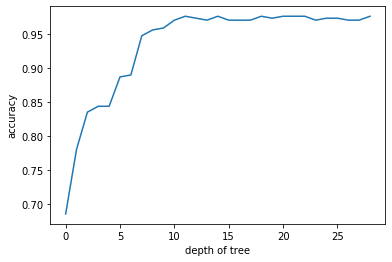

In [11]:
plt.plot(dtaccu)
plt.xlabel('depth of tree')
plt.ylabel('accuracy')
plt.show()

## Best parameter value is 12!

In [25]:
dtreefinal=DecisionTreeClassifier(max_depth=12)
dtreefinal.fit(X_train, y_train)
treefinalpred=dtreefinal.predict(X_test)

In [26]:
finaltreeacuuracy=metrics.accuracy_score(y_test, treefinalpred)
finaltreeacuuracy

0.9739884393063584

In [30]:
ytreepre=pd.DataFrame(data=treefinalpred,columns=['pred'])
yact=pd.DataFrame(data=y_test)
yact.index=range(0,346)
ytreetotal=pd.concat([yact,ytreepre],axis=1)
confutree=confusion_matrix(ytreetotal['decision'],ytreetotal['pred'])
confutree

array([[236,   1,   0,   0],
       [  1,  74,   1,   1],
       [  0,   2,  12,   1],
       [  0,   0,   2,  15]], dtype=int64)

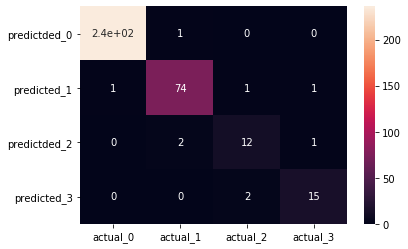

In [31]:
sns.heatmap(confutree,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();

# Karnough Nearest Neigbours classifier

In [33]:
knnaccu=[]
for i in tqdm(range(1,30)):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knnpre=knn.predict(X_test)
    y=metrics.accuracy_score(y_test,knnpre)
    knnaccu.append(y)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 66.30it/s]


In [35]:
maxknnaccu=max(knnaccu)
print(knnaccu)
maxknnaccu

[0.6878612716763006, 0.638728323699422, 0.6878612716763006, 0.6589595375722543, 0.6878612716763006, 0.6763005780346821, 0.6791907514450867, 0.6502890173410405, 0.6820809248554913, 0.6647398843930635, 0.6878612716763006, 0.6763005780346821, 0.6820809248554913, 0.684971098265896, 0.6820809248554913, 0.6820809248554913, 0.6820809248554913, 0.684971098265896, 0.684971098265896, 0.684971098265896, 0.6820809248554913, 0.6820809248554913, 0.6820809248554913, 0.684971098265896, 0.684971098265896, 0.684971098265896, 0.6791907514450867, 0.684971098265896, 0.6820809248554913]


0.6878612716763006

## Hyper-parameter value=5

In [36]:
bestknn=KNeighborsClassifier(n_neighbors=5)
yknnfinalpred=bestknn.fit(X_train,y_train).predict(X_test)

In [38]:
yknnpre=pd.DataFrame(data=yknnfinalpred,columns=['pred'])
yact=pd.DataFrame(data=y_test)
yact.index=range(0,346)
yknntotal=pd.concat([yact,yknnpre],axis=1)
confuknn=confusion_matrix(yknntotal['decision'],yknntotal['pred'])
confuknn

array([[207,  22,   8,   0],
       [ 49,  28,   0,   0],
       [ 10,   2,   3,   0],
       [  7,   5,   5,   0]], dtype=int64)

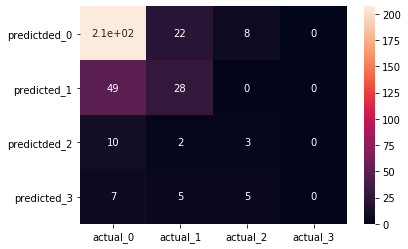

In [39]:
sns.heatmap(confuknn,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();